# Text Detection in Video using OCR

This Code Template is for Text Detection using OCR in Python. It takes a video as an input and outputs the text with a boundary/box surrounding it per frame in the video. This template uses EasyOCR to convert text on image to string.

### **Required Packages**

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-contrib-python --upgrade

In [63]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import warnings
warnings.filterwarnings("ignore")

### Initialization

Path of the video to be loaded

In [64]:
#video path variable
vid_path = ''

FPS you want to fetch from video


In [65]:
fps =''

### Call EasyOCR to read text
The following user-defined function takes an image comprising some text and the list of languages in which the text may have been written in, calls EasyOCR's <Code>Reader</Code> class and thens return the text as string

EasyOCR uses Pytorch at the backend

[List of supported languages](https://www.jaided.ai/easyocr/)

In [66]:
def recognize_text(img_path):
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [67]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'/content/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: Quit; don't quit (Probability: 0.88)
Detected text: Quit; dont (Probability: 0.93)
Detected text: quit (Probability: 0.66)
Detected text: noodles; don't noodles (Probability: 0.72)
Detected text: noodles; don't noodles (Probability: 0.70)
Detected text: noodles; don't noodles (Probability: 0.55)
Detected text: you are too concerned on what was (Probability: 0.91)
Detected text: you are too concerned on what was (Probability: 0.79)
Detected text: and what will be. (Probability: 0.59)
Detected text: and what will be. (Probability: 0.69)


<Figure size 432x288 with 0 Axes>

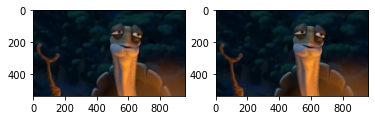

<Figure size 432x288 with 0 Axes>

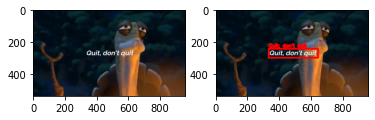

<Figure size 432x288 with 0 Axes>

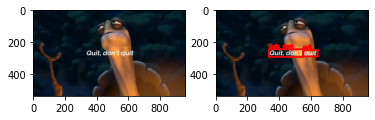

<Figure size 432x288 with 0 Axes>

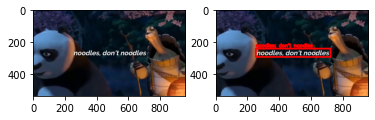

<Figure size 432x288 with 0 Axes>

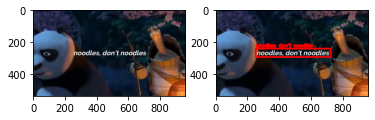

<Figure size 432x288 with 0 Axes>

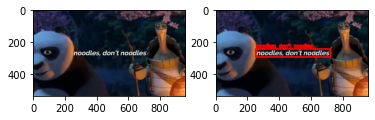

<Figure size 432x288 with 0 Axes>

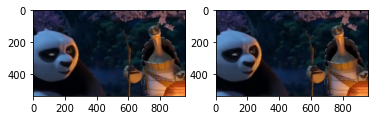

<Figure size 432x288 with 0 Axes>

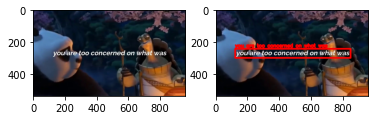

<Figure size 432x288 with 0 Axes>

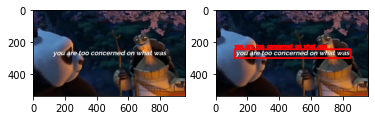

<Figure size 432x288 with 0 Axes>

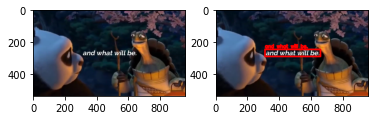

<Figure size 432x288 with 0 Axes>

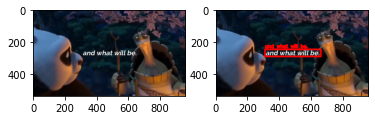

In [68]:
cap= cv2.VideoCapture(vid_path)
i=0
count=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('img'+str(i)+'.jpg',frame)
    i+=1
    count+=int(fps)
    cap.set(1,count)
    overlay_ocr_text('img'+str(i-1)+'.jpg','quote'+str(i-1))
 
cap.release()
cv2.destroyAllWindows()

#### Creator: Akshar Nerkar, Github: [Profile](https://github.com/Akshar777)